In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from scipy.stats import linregress,pearsonr
import time

In [2]:
#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together
Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")


Merge1920_df.head()

,country,happiness_score_2019,GDP_per_capita_2019,social_support_2019,life_expectancy_2019,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570


The correlation between both factors is 0.42
The correlation between both factors is 0.43


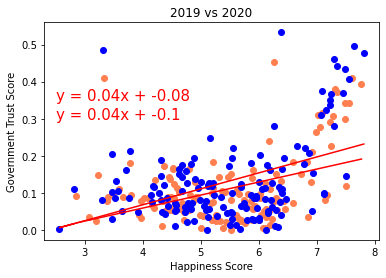

In [3]:
happiness_report = Merge1920_df
happiness_report

# Happy_2020 = Merge_df["happiness_score_2020"]
x_axis = happiness_report["happiness_score_2019"]
y_axis = happiness_report["corruption_2019"]
plt.scatter(x_axis, y_axis, c='coral')
plt.xlabel("Happiness Score")
plt.ylabel("Corruption Score")
plt.title("Happiness vs. Government Trust 2019")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(2.5,0.35),fontsize=15,color="red")
correlation = pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")


x_axis = happiness_report["happiness_score_2020"]
y_axis = happiness_report["corruption_2020"]
plt.scatter(x_axis, y_axis, c='blue')
plt.xlabel("Happiness Score")
plt.ylabel("Government Trust Score")
plt.title("2019 vs 2020")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(2.5,0.30),fontsize=15,color="red")
correlation = pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Images/Happy_Corrupt")
plt.show()


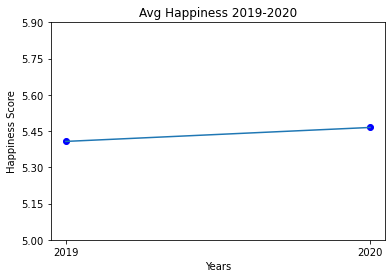

In [4]:
Happy_2019 = happiness_report["happiness_score_2019"].mean()
Happy_2020 = happiness_report["happiness_score_2020"].mean()

y = [Happy_2019, Happy_2020]
x = ['2019', '2020']
plt.scatter(x, y, c='blue')
plt.plot(x, y)
plt.yticks(np.arange(5,6,0.15))
plt.title("Avg Happiness 2019-2020")
plt.ylabel("Happiness Score")
plt.xlabel("Years")
plt.savefig("Images/Happiness_Score_19-20")
plt.show()

